In [23]:
nb_dir=_dh[0]
os.chdir(nb_dir+'/../output/lens')
sys.path.append(nb_dir)
from notebook_setup import *

%matplotlib inline
#%config InlineBackend.figure_format = "png" #  ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%reload_ext wurlitzer
%reload_ext memory_profiler
%reload_ext line_profiler

ism3d.logger_config(logfile='ism3d.log',loglevel='DEBUG',logfilelevel='DEBUG',log2term=False)

print(''+ism3d.__version__)
print('working dir: {}\n'.format(os.getcwd()))

0.3.dev1
working dir: /Users/Rui/Resilio/Workspace/projects/ism3d/models/output/lens



0.004395646376778473 183.8979913737746
0.003802698704205909 205.53009639870947


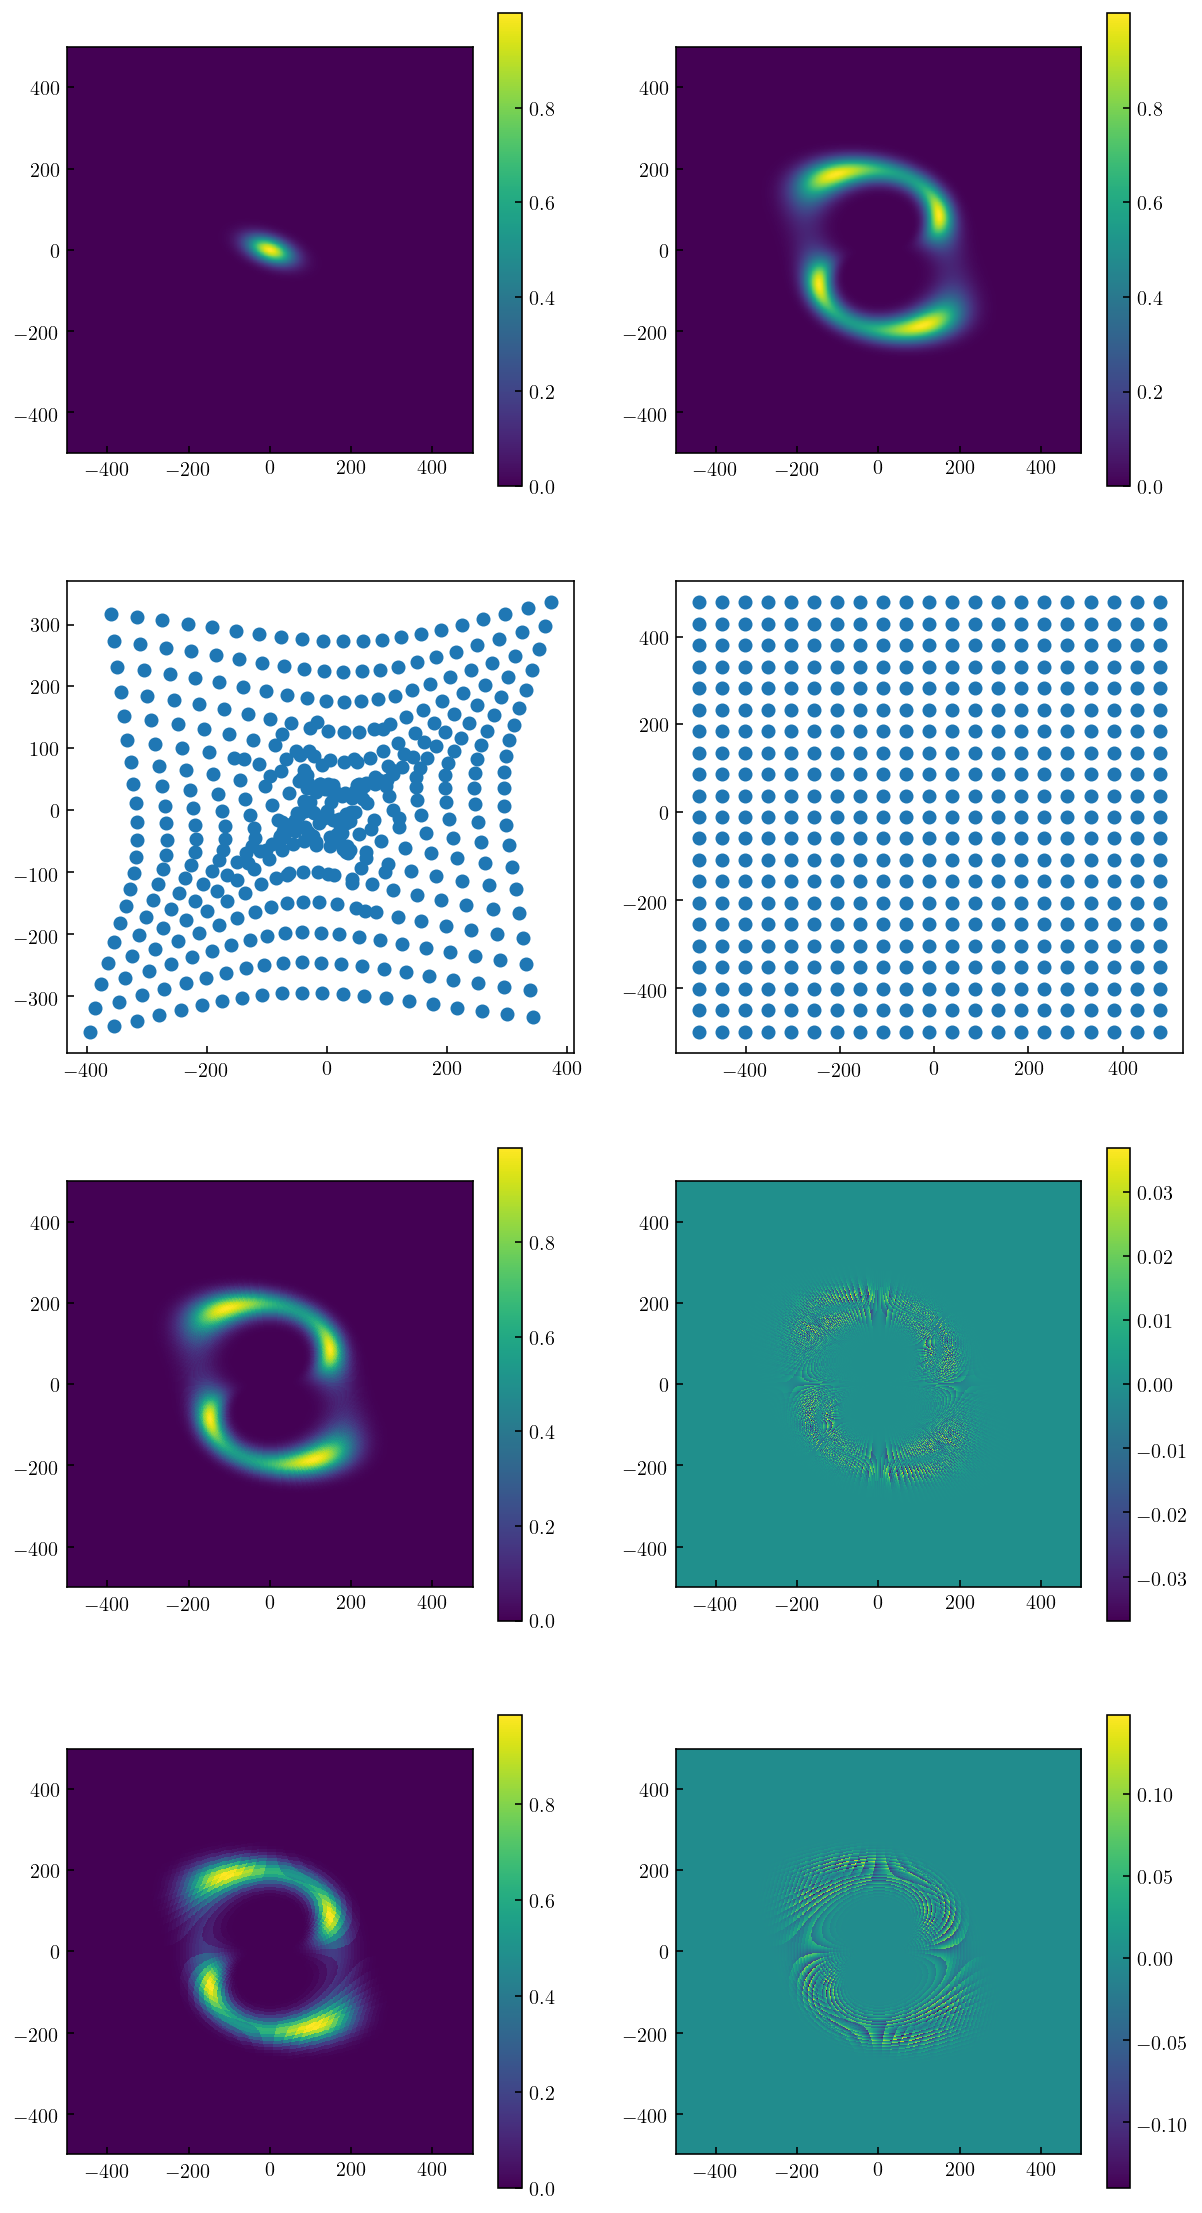

In [26]:
inpfile='../../input/mockup_lens.ini'
inp_dict=read_inp(inpfile)
mod_dict=inp_to_mod(inp_dict)
mod_dict['obj5']


# make source

x=np.linspace(-500,500,512)
y=np.linspace(-500,500,512)
xx,yy=np.meshgrid(x,y)
source=eval_apmodel2d(mod_dict['obj5'],xx,yy)

# make lensed souce

l_amp = 200   # Einstein radius
l_xcen = 0.0  # x position of center
l_ycen = 0.0  # y position of center
l_axrat = 0.5 # minor-to-major axis ratio
l_pa = 30.    # major-axis position angle (degrees) c.c.w. from x axis
lpar = np.asarray([l_amp, l_xcen, l_ycen, l_axrat, l_pa])
(xg, yg) = sie_grad(xx, yy, lpar)
xs=xx-xg; ys=yy-yg
source_lensed=eval_apmodel2d(mod_dict['obj5'],xs,ys)
print(np.min(np.abs(xg)),np.max(np.abs(xg)))
print(np.min(np.abs(yg)),np.max(np.abs(yg)))

cell=abs(x[0]-x[1])
ix=(xs-(-500))/cell
iy=(ys-(-500))/cell
source_lensed_cc=source[np.round(iy).astype(np.int),np.round(ix).astype(np.int)]

x_ccc=np.linspace(-500,500,128)
y_ccc=np.linspace(-500,500,128)

xx_ccc,yy_ccc=np.meshgrid(x_ccc,y_ccc)
source_ccc=eval_apmodel2d(mod_dict['obj5'],xx_ccc,yy_ccc)

cell_ccc=abs(x_ccc[0]-x_ccc[1])
ix_ccc=(xs-(-500))/cell_ccc
iy_ccc=(ys-(-500))/cell_ccc
source_lensed_ccc=source_ccc[np.round(iy_ccc).astype(np.int),np.round(ix_ccc).astype(np.int)]

### PLOT

figname='lens_apmodel2d.pdf'
fig, axs = plt.subplots(4,2, figsize=(10,20))
axs=np.array(axs).reshape(-1)

im0=axs[0].imshow(source,extent=[-500,500,-500,500])
cb0=fig.colorbar(im0, ax=axs[0])
im1=axs[1].imshow(source_lensed,extent=[-500,500,-500,500])
cb1=fig.colorbar(im1, ax=axs[1])


# plot source/lense plane sub-sampling points

axs[2].scatter(xs[::25,::25],ys[::25,::25])
axs[3].scatter(xx[::25,::25],yy[::25,::25])

# use a fine-sampling image

im4=axs[4].imshow(source_lensed_cc,extent=[-500,500,-500,500])
im5=axs[5].imshow(source_lensed_cc-source_lensed,extent=[-500,500,-500,500])
cb4=fig.colorbar(im4, ax=axs[4])
cb5=fig.colorbar(im5, ax=axs[5])

# use a coarse-sampling image rather than analytical function

im6=axs[6].imshow(source_lensed_ccc,extent=[-500,500,-500,500])
im7=axs[7].imshow(source_lensed_ccc-source_lensed,extent=[-500,500,-500,500])
cb6=fig.colorbar(im6, ax=axs[6])
cb7=fig.colorbar(im7, ax=axs[7])

prepdir(figname)
fig.savefig(figname)


In [81]:


def triangle_area(x1, y1, x2, y2, x3, y3):
    return abs(0.5*(x1*(y2-y3)+x2*(y3-y1)+x3*(y1-y2)))

def PointInsideTriangle_method1(x1, y1, x2, y2, x3, y3,x_arr,y_arr,count=False):
    A=triangle_area(x1, y1, x2, y2, x3, y3)
    A1 = triangle_area(x_arr, y_arr, x2, y2, x3, y3) 
    A2 = triangle_area(x1, y1, x_arr, y_arr, x3, y3)
    A3 = triangle_area(x1, y1, x2, y2, x_arr, y_arr)
    if count==True:
        return np.count_nonzero(np.equal(A,A1+A2+A3)),A
    else:
        return np.equal(A,A1+A2+A3)
    
x_arr=np.random.rand(10**6)
y_arr=np.random.rand(10**6)

%lprun -f PointInsideTriangle_method1 PointInsideTriangle_method1(0,0,0,1,1,1,x_arr,y_arr,count=True)
pprint(PointInsideTriangle_method1(0,0,0,1,1,1,x_arr,y_arr,count=True))

(499601, 0.5)


Timer unit: 1e-06 s

Total time: 0.048016 s
File: <ipython-input-81-6b10a9dec705>
Function: PointInsideTriangle_method1 at line 4

Line #      Hits         Time  Per Hit   % Time  Line Contents
     4                                           def PointInsideTriangle_method1(x1, y1, x2, y2, x3, y3,x_arr,y_arr,count=False):
     5         1          5.0      5.0      0.0      A=triangle_area(x1, y1, x2, y2, x3, y3)
     6         1      17852.0  17852.0     37.2      A1 = triangle_area(x_arr, y_arr, x2, y2, x3, y3) 
     7         1      15606.0  15606.0     32.5      A2 = triangle_area(x1, y1, x_arr, y_arr, x3, y3)
     8         1      10408.0  10408.0     21.7      A3 = triangle_area(x1, y1, x2, y2, x_arr, y_arr)
     9         1          2.0      2.0      0.0      if count==True:
    10         1       4143.0   4143.0      8.6          return np.count_nonzero(np.equal(A,A1+A2+A3)),A
    11                                               else:
    12                                     

In [78]:
from matplotlib.path import Path

def triangle_area(x1, y1, x2, y2, x3, y3):
    return abs(0.5*(x1*(y2-y3)+x2*(y3-y1)+x3*(y1-y2)))

def PointInsideTriangle_method2(x1, y1, x2, y2, x3, y3,x_arr,y_arr,count=False):
    A=triangle_area(x1, y1, x2, y2, x3, y3)
    p=Path([(x1,y1),(x2,y2),(x3,y3)])
    points = np.vstack((x_arr,y_arr)).T
    cc=p.contains_points(points)
    if count==True:
        return cc.sum(),A
    else:
        return cc

x_arr=np.random.rand(10**6)
y_arr=np.random.rand(10**6)

%lprun -f PointInsideTriangle_method2 PointInsideTriangle_method2(0,0,0,1,1,1,x_arr,y_arr,count=True)  
pprint(PointInsideTriangle_method2(0,0,0,1,1,1,x_arr,y_arr,count=True))

(500743, 0.5)


Timer unit: 1e-06 s

Total time: 0.031487 s
File: <ipython-input-78-76b286e3cfe3>
Function: PointInsideTriangle_method2 at line 6

Line #      Hits         Time  Per Hit   % Time  Line Contents
     6                                           def PointInsideTriangle_method2(x1, y1, x2, y2, x3, y3,x_arr,y_arr,count=False):
     7         1          5.0      5.0      0.0      A=triangle_area(x1, y1, x2, y2, x3, y3)
     8         1         38.0     38.0      0.1      p=Path([(x1,y1),(x2,y2),(x3,y3)])
     9         1       2241.0   2241.0      7.1      points = np.vstack((x_arr,y_arr)).T
    10         1      26944.0  26944.0     85.6      cc=p.contains_points(points)
    11         1          3.0      3.0      0.0      if count==True:
    12         1       2256.0   2256.0      7.2          return cc.sum(),A
    13                                               else:
    14                                                   return cc

{'clouds_loc': <CartesianRepresentation (x, y, z) in kpc
    [(-11.12177323, -13.83754142, -36.20298477),
     ( 19.15298309,   6.95474474,  20.61408669),
     (  1.35390224,  -4.27555465,  -7.32368815), ...,
     (-20.08659297,  -0.0994958 , -10.74597677),
     ( -9.77598476,   6.06115733,   3.40103504),
     ( 46.90491307, -29.32584697, -24.76410754)]>,
 'clouds_source': <CartesianRepresentation (x, y, z) in kpc
    [(-39.75615752,   5.71833034, -3.5462848 ),
     ( 24.39533692, -15.61925408, -1.02578963),
     ( -8.11982265,  -2.73457776, -0.58343092), ...,
     (-12.78804631,  18.84119362,  0.6575924 ),
     (  4.1214033 ,  11.25945864, -0.33640983),
     (-27.20377468, -54.10623107, -2.40989517)]>,
 'clouds_wt': None,
 'contflux': (<Quantity 1.e-05 Jy>, <Quantity 20. GHz>, 8.0),
 'inc': <Quantity 60. deg>,
 'pa': <Quantity 70. deg>,
 'rcProf': ('tanh', <Quantity 300. km / s>, <Quantity 2. kpc>),
 'sbProf': ('sersic2d', <Quantity 40. kpc>, 0.8),
 'type': 'disk3d',
 'vbProf': ('sech

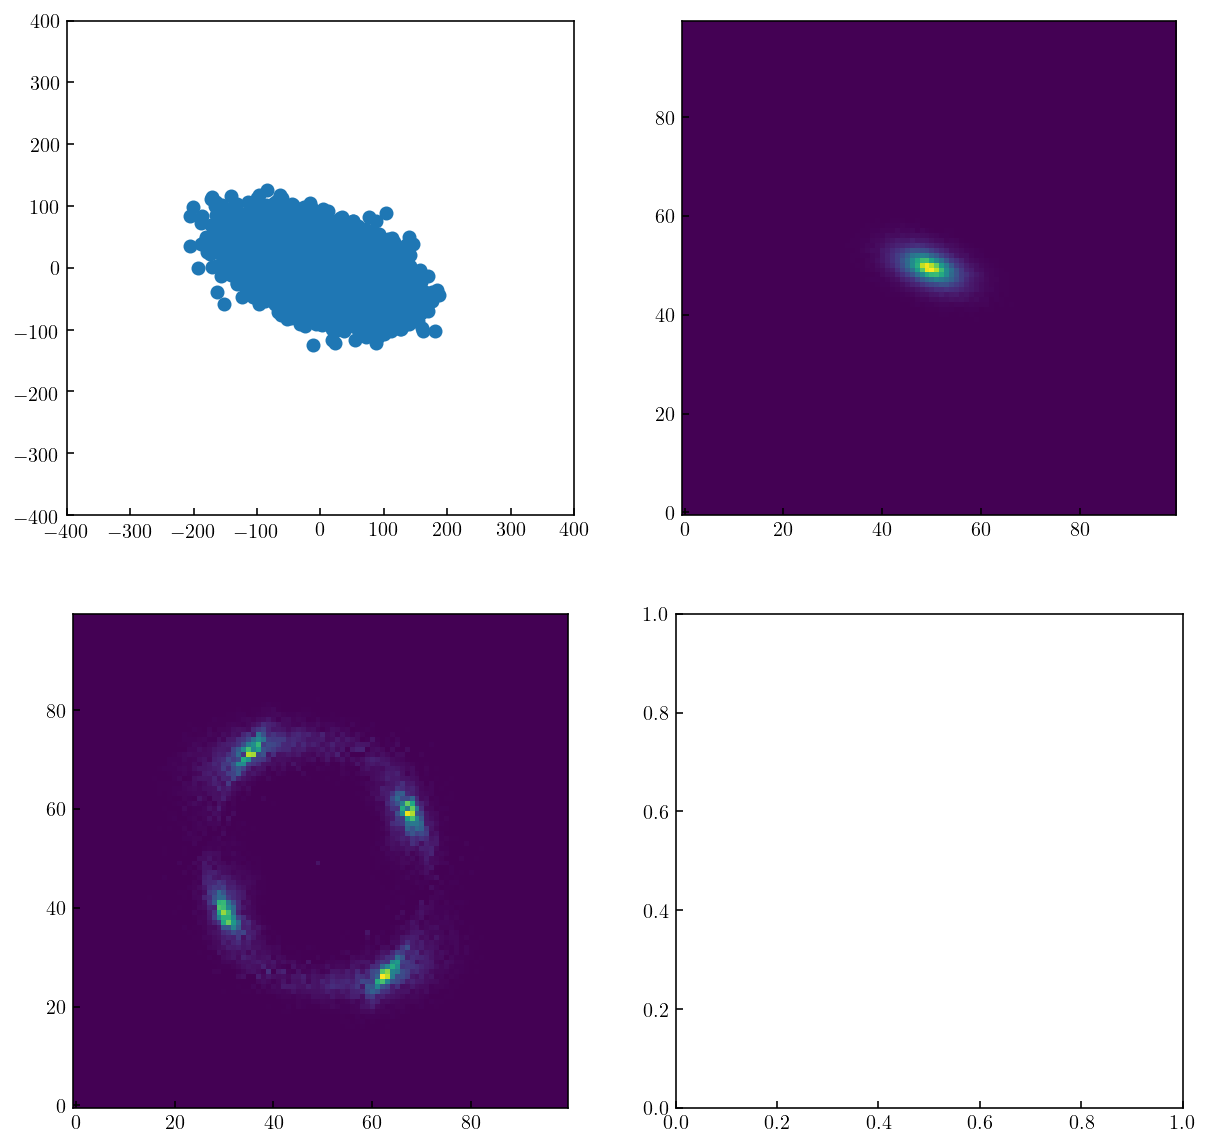

Timer unit: 1e-06 s

Total time: 25.4884 s
File: <ipython-input-81-6b10a9dec705>
Function: PointInsideTriangle_method1 at line 4

Line #      Hits         Time  Per Hit   % Time  Line Contents
     4                                           def PointInsideTriangle_method1(x1, y1, x2, y2, x3, y3,x_arr,y_arr,count=False):
     5     19602      56083.0      2.9      0.2      A=triangle_area(x1, y1, x2, y2, x3, y3)
     6     19602    7535793.0    384.4     29.6      A1 = triangle_area(x_arr, y_arr, x2, y2, x3, y3) 
     7     19602    7563608.0    385.9     29.7      A2 = triangle_area(x1, y1, x_arr, y_arr, x3, y3)
     8     19602    7659633.0    390.8     30.1      A3 = triangle_area(x1, y1, x2, y2, x_arr, y_arr)
     9     19602      14592.0      0.7      0.1      if count==True:
    10     19602    2658717.0    135.6     10.4          return np.count_nonzero(np.equal(A,A1+A2+A3)),A
    11                                               else:
    12                                      

In [84]:
from ism3d.arts.sparse import clouds_morph,clouds_discretize_2d

inpfile='../../input/mockup_lens.ini'
inp_dict=read_inp(inpfile)
mod_dict=inp_to_mod(inp_dict)

clouds_from_disk3d(mod_dict['contdisk3'],nc=100000,nv=20,seeds=[None]*4)
clouds_loc=mod_dict['contdisk3']['clouds_loc']
pprint(mod_dict['contdisk3'])
# sbProf=('sersic2d',0.1,1)
# clouds_loc,cloudmeta=clouds_morph(sbProf,seeds=[None,None,None],size=10**6)

im=clouds_discretize_2d(clouds_loc,range=[[-400,+400],[-400,+400]],bins=(100,100))
fig, axs = plt.subplots(2,2, figsize=(10,10))
axs=np.array(axs).reshape(-1)
axs[0].scatter(clouds_loc.x,clouds_loc.y)
axs[0].set_xlim(-400,400)
axs[0].set_ylim(-400,400)
axs[1].imshow(im)

xp=clouds_loc.x.value
yp=clouds_loc.y.value
points = np.vstack((xp,yp)).T 

sx=np.linspace(-400,400,100)
sy=np.linspace(-400,400,100)
xx,yy=np.meshgrid(sx,sy)

l_amp = 200   # Einstein radius
l_xcen = 0.0  # x position of center
l_ycen = 0.0  # y position of center
l_axrat = 0.5 # minor-to-major axis ratio
l_pa = 30.    # major-axis position angle (degrees) c.c.w. from x axis
lpar = np.asarray([l_amp, l_xcen, l_ycen, l_axrat, l_pa])
(xg, yg) = sie_grad(xx, yy, lpar)

# xx-xg,yy-yg source plane coordins
# xx,yy lens plane

xs=xx-xg
ys=yy-yg
cc=xx*0

def ray_tracing(xs,ys):
    cc=xs*0.0
    nxy=xs.shape
    for i in range(nxy[0]-1):
        for j in range(nxy[1]-1):
            cc1,ss1=PointInsideTriangle_method1(xs[i,j],ys[i,j],xs[i+1,j],ys[i+1,j],xs[i+1,j+1],ys[i+1,j+1],
                xp,yp,count=True)
            cc2,ss2=PointInsideTriangle_method1(xs[i,j],ys[i,j],xs[i+1,j+1],ys[i+1,j+1],xs[i,j+1],ys[i,j+1],
                xp,yp,count=True)            
            cc[i,j]=float(cc1)/ss1+float(cc2)/ss2
    return cc

%lprun -f PointInsideTriangle  cc=ray_tracing(xs,ys)

axs[2].imshow(cc)